<div class="output_png output_subarea output_execute_result">
<center>
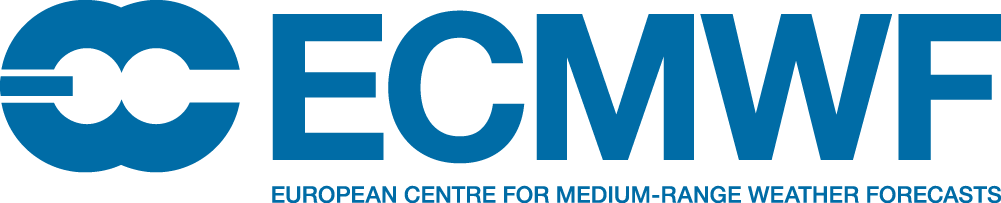</center>
</div>

# 	Temperature and geopotential at various pressure levels

This notebook will provide you guidance how to explore and plot ECMWF open dataset to produce the map from the ECMWF open charts web product.  
The original product can be found on this link: https://apps.ecmwf.int/webapps/opencharts/products/medium-t-z

## Retrieve Data
This product takes in input 3 parameters :

* [Geopotential height](https://apps.ecmwf.int/codes/grib/param-db/?id=156)
* [Temperature](https://apps.ecmwf.int/codes/grib/param-db/?id=130)

In this example, we will use: 
- **ecmwf.opendata** Client to download the data
- **ecmwf.data** library to read and process the data (calculate the speed and probabilities)
- **ecmwf.geomaps** to plot the result

First we need to install them in the current Jupyter kernel:  
<div class="alert alert-block alert-info">
<b>Note:</b> Skip this cell if you already have these libraries installed
</div>

In [ ]:
import sys
!{sys.executable} -m pip install ecmwf-data ecmwf-opendata git+https://github.com/ecmwf/ecmwf-geomaps.git

In [1]:
import ecmwf.data as ecdata
from ecmwf.geomaps import GeoMap
from ecmwf.opendata import Client

In [2]:
client = Client("https://ai4edataeuwest.blob.core.windows.net/ecmwf", beta=True)

In [3]:
parameters = ['t', 'gh']
filename_t = 't_test.grib'
filename_gh = 'gh_test.grib'
filename_t

't_test.grib'

In [4]:
client.retrieve(
    date=-2,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=[1000,925,850,700,500,300,250,200,50],
    param='t',
    target=filename_t
)

20220104000000-12h-oper-fc.grib2:   0%|          | 0.00/5.23M [00:00<?, ?B/s]

In [5]:
client.retrieve(
    date=-2,
    time=0,
    step=12,
    stream="oper",
    type="fc",
    levtype="pl",
    levelist=[1000,925,850,700,500,300,250,200,50],
    param='gh',
    target=filename_gh
)

20220104000000-12h-oper-fc.grib2:   0%|          | 0.00/5.23M [00:00<?, ?B/s]

## Reading and processing the data
Now we can use **ecmwf.data** to read the file.

In [8]:
t = ecdata.read(filename_t)
gh = ecdata.read(filename_gh)

In [9]:
t.ls()

KeyValueNotFoundError: Key/value not found

The **describe()** function will give us the overview of the dataset.  

In [ ]:
t.describe()

And an overview of one parameter

In [ ]:
gh.describe()

We can use **ls()** function to list all the fields in the file we downloaded.

In [7]:
t.ls()

KeyValueNotFoundError: Key/value not found

In [14]:
gh.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,gh,isobaricInhPa,300,20220103,0,12,fc,None,regular_ll
1,ecmf,gh,isobaricInhPa,250,20220103,0,12,fc,None,regular_ll
2,ecmf,gh,isobaricInhPa,925,20220103,0,12,fc,None,regular_ll
3,ecmf,gh,isobaricInhPa,700,20220103,0,12,fc,None,regular_ll
4,ecmf,gh,isobaricInhPa,850,20220103,0,12,fc,None,regular_ll
5,ecmf,gh,isobaricInhPa,50,20220103,0,12,fc,None,regular_ll
6,ecmf,gh,isobaricInhPa,1000,20220103,0,12,fc,None,regular_ll
7,ecmf,gh,isobaricInhPa,500,20220103,0,12,fc,None,regular_ll
8,ecmf,gh,isobaricInhPa,200,20220103,0,12,fc,None,regular_ll


The grib file contains all the parameters and levels, and we will use the **select()** function to filter what we need.

In [10]:
t850 = t.select(level=1000)
t850.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
Message,,,,,,,,,,
0,ecmf,t,isobaricInhPa,1000,20220103,0,12,fc,None,regular_ll


In [18]:
gh850 = gh.select(level=850)/100
gh850.describe()

parameter,typeOfLevel,level,date,time,step,number,paramId,class,stream,type,experimentVersionNumber
gh,isobaricInhPa,850,20220103,0,12,None,156,od,oper,fc,0001


And finally, we can plot the data on the map. 

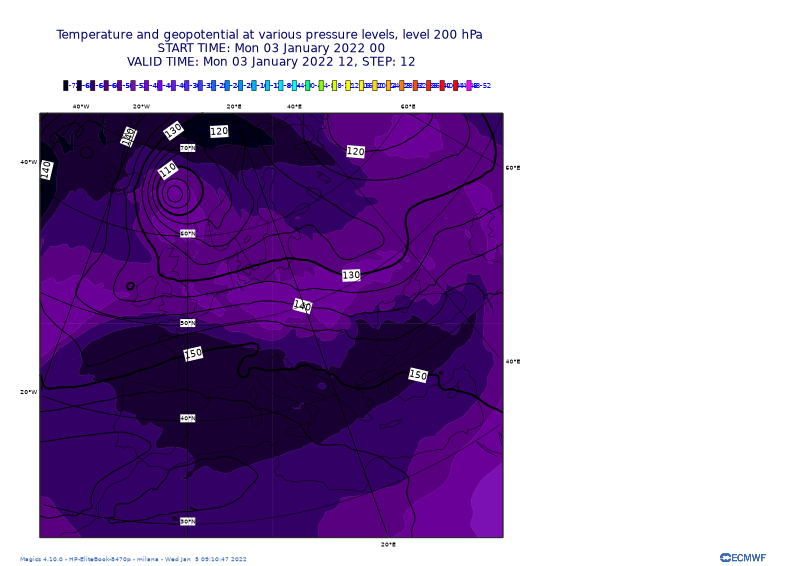

In [19]:
fig = GeoMap(area_name='europe', preset='background-foreground')

fig.contour_lines(t850, preset="sh_all_fM64t52i4")
fig.contour_lines(gh850, preset="ct_blk_i5_t2")

fig.title(["Temperature and geopotential at various pressure levels, level <grib_info key='level' where='shortName=t' /> hPa ", 
           "START TIME: <grib_info key='base-date' format='%a %d %B %Y %H' where='shortName=t'/> ",
           "VALID TIME: <grib_info key='valid-date' format='%a %d %B %Y %H' where='shortName=t'/>, STEP: <grib_info key='step' where='shortName=t' />"])
fig.show()